<a href="https://colab.research.google.com/github/abdulkarim1800/abdulkarim1/blob/main/Copy_of_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv('car data.csv')

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.shape

(301, 9)

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


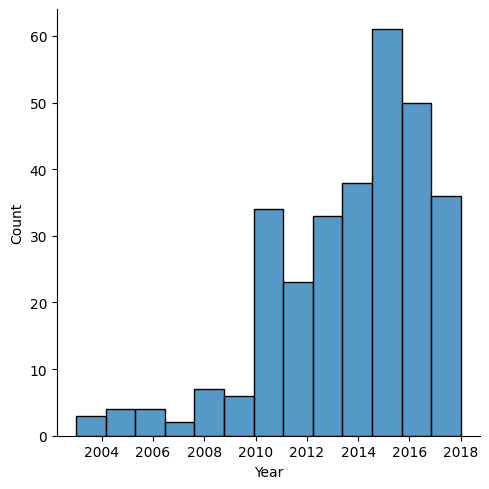

In [11]:
sns.displot(df['Year'])

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


corallition


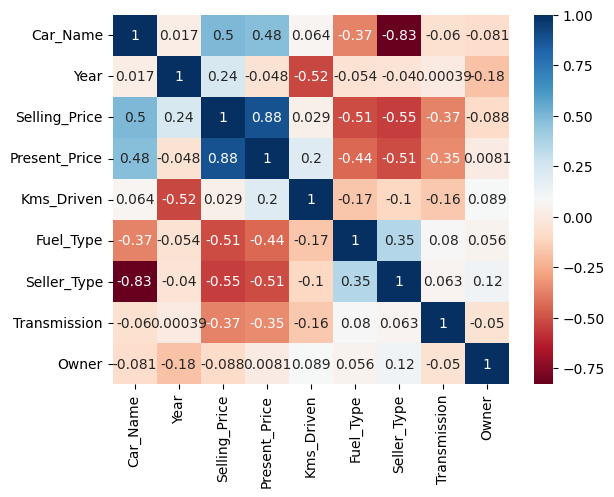

In [14]:
df['Car_Name'] = pd.Categorical(df['Car_Name']).codes
df['Fuel_Type'] = pd.Categorical(df['Fuel_Type']).codes
df['Seller_Type'] = pd.Categorical(df['Seller_Type']).codes
df['Transmission'] = pd.Categorical(df['Transmission']).codes
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [15]:
X= df.drop('Present_Price', axis=1)
y= df['Present_Price']
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
scaler = StandardScaler()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


liner regression

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 2.093654001591822
Mean Squared Error: 10.772617881990834
Root Mean Squared Error: 3.2821666444577176
R2 Score: 0.7864129737324753


RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R oot Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.3762901639344258
Mean Squared Error: 6.650078314636062
R oot Mean Squared Error: 2.578774576157455
R2 Score: 0.8681499272295011


svr

In [26]:
from sklearn.svm import SVR

In [27]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

SVR(kernel='linear')

In [28]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 2.0160190351309852
Mean Squared Error: 12.942443096823366
Root Mean Squared Error: 3.5975607148209976
R2 Score: 0.7433921852636722


DecisionTree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.5526721311475409
Mean Squared Error: 7.664800672131147
Root Mean Squared Error: 2.7685376414510148
R2 Score: 0.8480311842091189


polynomial regression

In [32]:
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)

In [33]:
df2=df['Present_Price']
df1=df['Selling_Price']
print(df2.shape)
print(df1.shape)

(301,)
(301,)


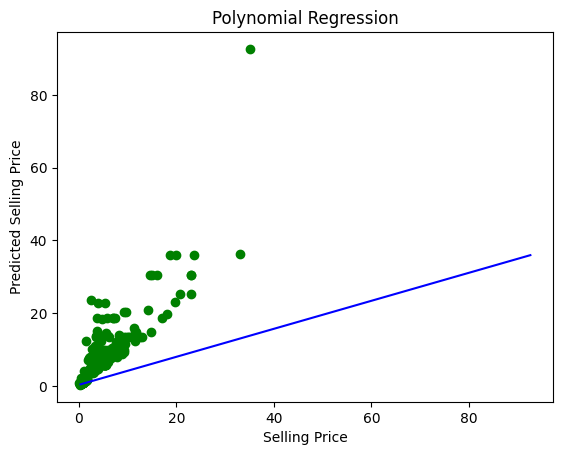

In [34]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)
plt.scatter(df1, df2, color = 'green')

plt.plot([min(y_train), max(y_train)], [min(y_pred), max(y_pred)], color='blue')  # خط الاتجاه
plt.title('Polynomial Regression')
plt.xlabel('Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


In [35]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:',r_square)

R-Square Error associated with Polynomial Regression is: 0.9111932667730588


In [40]:
from sklearn.metrics import mean_absolute_error as mae
regression_models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

for model in regression_models:
    model.fit(X_train, y_train)
    print(f'{model} : ')
    train_preds = model.predict(X_train)
    print('Training Error : ', mae(y_train, train_preds))
    print('Training Accuracy : ',100 - float(mae(y_train, train_preds)))
    val_preds = model.predict(X_test)
print('Validation Error : ', mae(y_pred, val_preds))
print('Validation Accuracy : ',100 - float(mae(y_pred, val_preds)))
print()

LinearRegression() : 
Training Error :  1.9969738165480815
Training Accuracy :  98.00302618345192
RandomForestRegressor() : 
Training Error :  0.5043810000000004
Training Accuracy :  99.495619
DecisionTreeRegressor() : 
Training Error :  0.0
Training Accuracy :  100.0
Validation Error :  0.28560655737704926
Validation Accuracy :  99.71439344262295

